<a href="https://colab.research.google.com/github/nurrizkyimani/longlife_learning/blob/master/Nurrizky_Imani_cc_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive thingy 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kaggle Thingy

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ! mkdir ~/.kaggle
# ! cp /content/drive/MyDrive/nlp_research/2022_data_analysis/kaggle_2.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

# {"username":"bocahrokok","key":"3470fa29c5901d007de08e0f97175435"}
# os.environ['KAGGLE_KEY'] = "e84247255109e51ea31886308e848c7f"

import os 
os.environ['KAGGLE_USERNAME'] = "bocahrokok" 
os.environ['KAGGLE_KEY'] = "c77b06e7a18b4931860118a28888ed31"


# kaggle datasets download -d takuok/glove840b300dtxt

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/nlp_research/2022_data_analysis/"


In [ ]:
%cd /content/drive/MyDrive/nlp_research/2022_data_analysis/

/content/drive/MyDrive/nlp_research/2022_data_analysis


In [ ]:
! kaggle datasets download kartik2112/fraud-detection

 97% 196M/202M [00:02<00:00, 80.6MB/s]
100% 202M/202M [00:02<00:00, 70.9MB/s]


In [ ]:
! unzip /content/drive/MyDrive/nlp_research/2022_data_analysis/fraud-detection.zip

Archive:  /content/drive/MyDrive/nlp_research/2022_data_analysis/fraud-detection.zip
  inflating: fraudTest.csv           
  inflating: fraudTrain.csv          


# Import All

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 850 kB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.creation import CyclicalTransformer

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

# Load data, date correction

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/nlp_research/2022_data_analysis/fraudTrain.csv', index_col=0)
test = pd.read_csv('/content/drive/MyDrive/nlp_research/2022_data_analysis/fraudTest.csv', index_col=0)

In [ ]:
print(test.shape),print(train.shape)

(555719, 22)
(1296675, 22)


(None, None)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

# EDA ity

In [ ]:
total = pd.concat([test,train])
total.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000


In [ ]:
total.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21


In [ ]:
len(total)

1852394

In [ ]:
r = total[total['is_fraud']==1]
is_fraud_len = r.shape[0]


print(is_fraud_len)

9651


In [ ]:
r = total[total['is_fraud']==0]
is_not_fraud_len = r.shape[0]

print(is_not_fraud_len)

1842743


In [ ]:
r = total[total['is_fraud']==0]
is_not_fraud_len = r.shape[0]

print(is_not_fraud_len)

1842743


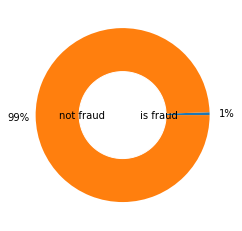

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
size_of_groups=[is_fraud_len, is_not_fraud_len ]

size_of_groups = np.asarray(size_of_groups)


ttl = len(total)
data_per = size_of_groups/ttl*100

# Create a pieplot
plt.pie(size_of_groups, labels = ['is fraud', 'not fraud'], autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.2)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [ ]:
total.groupby('is_fraud').count

<bound method DataFrameGroupBy.count of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fabc5cfddd0>>

In [ ]:
total['trans_date_trans_time'].head()

0   2020-06-21 12:14:25
1   2020-06-21 12:14:33
2   2020-06-21 12:14:53
3   2020-06-21 12:15:15
4   2020-06-21 12:15:17
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
#df['Dates'] = pd.to_datetime(df['date']).dt.date

total['month'] = pd.to_datetime(total['trans_date_trans_time']).dt.month

total['hour'] = pd.to_datetime(total['trans_date_trans_time']).dt.hour

total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1296674
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time             

In [ ]:
total_time = total[['month', 'hour']][total['is_fraud'] == 1].copy()


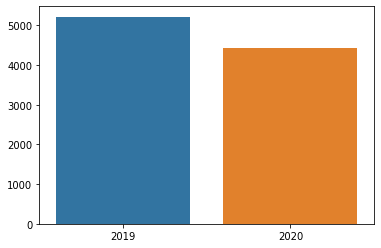

In [ ]:
total['month'] = pd.to_datetime(total['trans_date_trans_time']).dt.month

total['year'] = pd.to_datetime(total['trans_date_trans_time']).dt.year

total_time_2 = total[['month', 'year']][total['is_fraud'] == 1].copy()

values = total_time_2['year'].value_counts().keys().tolist()
counts = total_time_2['year'].value_counts().tolist()


raw_data = {'x' : values, 'y' : counts}

# sns barplot for year
sns.barplot(data=raw_data, x="x", y="y")


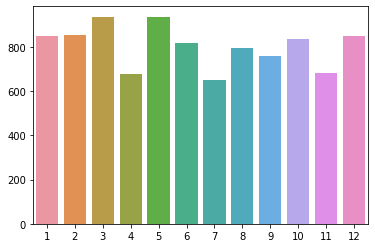

In [ ]:
values_m = total_time_2['month'].value_counts().keys().tolist()
counts_m = total_time_2['month'].value_counts().tolist()

raw_data_m = {'x' : values_m, 'y' : counts_m}

#sns barplot for month 
sns.barplot(data=raw_data_m, x="x", y="y")

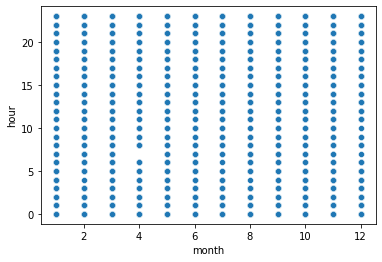

In [ ]:
total_time.head()

sns.scatterplot(data=total_time, x="month", y="hour")

In [ ]:
#sns.barplot(x="year", y="month", data=total_time_2)

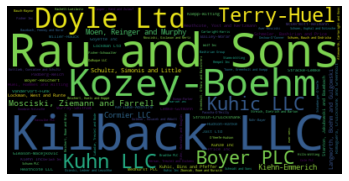

In [ ]:
total_merchant = total['merchant'][total['is_fraud'] == 1]

freq = {}

for t in total_merchant:
  word = t[6:]

  if word in freq: 
      freq[word] += 1
  else:
       freq[word] = 1

  # d = {}
# for a, x in bag.values:
#     d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


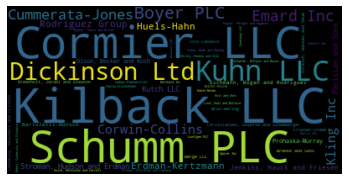

In [ ]:
total_merchant = total['merchant'][total['is_fraud'] == 0]

freq = {}

for t in total_merchant:
  word = t[6:]

  if word in freq: 
      freq[word] += 1
  else:
       freq[word] = 1

  # d = {}
# for a, x in bag.values:
#     d[a] = x

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=freq)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
total_merchant = total['merchant'][total['is_fraud'] == 0]

freq = {}

for t in total_merchant:
  word = t[6:]

  if word in freq: 
      freq[word] += 1
  else:
       freq[word] = 1


freq_val = []
freq_key = []

for key, value in freq.items():
  freq_key.append(key)
  freq_val.append(value)




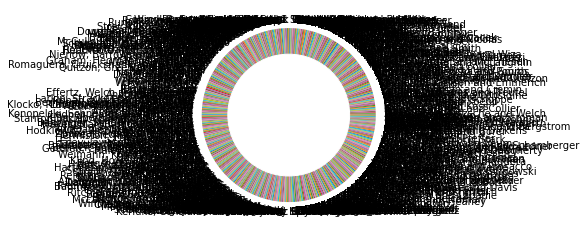

In [ ]:
# library
import matplotlib.pyplot as plt
 
# create data
names = freq_key
size = freq_val
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, )
p = plt.gcf()
p.gca().add_artist(my_circle)

# Show the graph
plt.show()

In [ ]:
total_m_a = total[['merchant','amt']][total['is_fraud'] == 1]

freq = {}


for index, row in total_m_a.iterrows():
    word = row['merchant']
    amount = row['amt']
    if word in freq: 
      freq[word] += amount
    else:
      freq[word] = amount

dft = pd.DataFrame(freq.items(), columns=['merchant', 'amt'])

dft = dft.sort_values(by=['amt'], ascending=False)

dft_top_10 = dft[3:6]


In [ ]:
dft_top_10['merchant']

30     fraud_Mosciski, Ziemann and Farrell
3      fraud_Heathcote, Yost and Kertzmann
83    fraud_Langworth, Boehm and Gulgowski
94                    fraud_Boyer-Reichert
Name: merchant, dtype: object

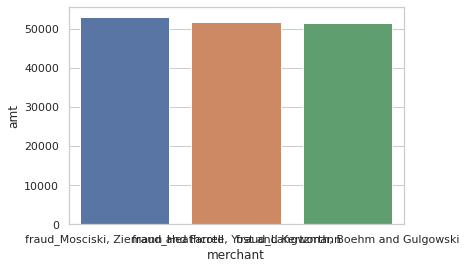

In [ ]:
dft_top_10

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="merchant", y="amt", data=dft_top_10)

In [ ]:
total_job = total[['job', 'is_fraud']]

,job,is_fraud
0,Mechanical engineer,0
1,"Sales professional, IT",0
2,"Librarian, public",0
3,Set designer,0
4,Furniture designer,0


In [ ]:
# fraud
total_job_fraud = total[['job', 'is_fraud']][total['is_fraud'] == 1]
freq = {}

print(len(total_job_fraud))

for index, row in total_job_fraud.iterrows():
    word = row['job']
    if word in freq: 
      freq[word] += 1
    else:
      freq[word] = 1

dft_fraud = pd.DataFrame(freq.items(), columns=['job', 'sum'])
dft_fraud = dft_fraud.sort_values(by=['job'])


9651


In [ ]:
dft_fraud.head()


,job,sum
248,Academic librarian,11
373,"Accountant, chartered",11
77,"Accountant, chartered certified",21
451,"Accountant, chartered public finance",9
195,Accounting technician,33


In [ ]:
# not fraud
total_job_fraud_not = total[['job', 'is_fraud']][total['is_fraud'] == 0]
freq = {}

print(len(total_job_fraud_not))

for index, row in total_job_fraud_not.iterrows():
    word = row['job']
    if word in freq: 
      freq[word] += 1
    else:
      freq[word] = 1

dft_fraud_not = pd.DataFrame(freq.items(), columns=['job', 'sum'])
dft_fraud_not = dft_fraud_not.sort_values(by=['job'])


1842743


In [ ]:
dft_fraud_not.head()

,job,sum
318,Academic librarian,1456
189,"Accountant, chartered certified",730
142,"Accountant, chartered public finance",3648
73,Accounting technician,6562
439,Acupuncturist,2188


In [ ]:
dft_fraud_not_head = dft_fraud_not.head(15)
dft_fraud_head = dft_fraud_not.head(15)

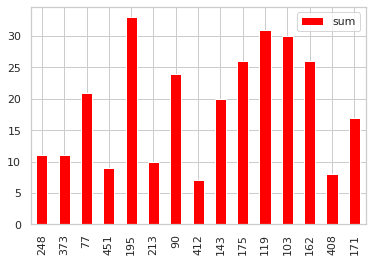

In [ ]:
dft_fraud_head.plot(kind='bar', color=['red'])

In [ ]:
dft_fraud_head.head()

,job,sum
318,Academic librarian,1456
189,"Accountant, chartered certified",730
142,"Accountant, chartered public finance",3648
73,Accounting technician,6562
439,Acupuncturist,2188


In [ ]:
lst_job = []
lst_sum_fraud = []
lst_sum_not_fraud = []
  
# list of int
lst2 = [11, 22, 33, 44, 55, 66, 77]

for (idxRow, s1), (_, s2) in zip(dft_fraud.iterrows(), dft_fraud_not.iterrows()):
  lst_job.append(s1['job'])
  lst_sum_fraud.append(s1['sum'])
  lst_sum_not_fraud.append(s2['sum'])
  

In [ ]:
df_sum = pd.DataFrame(list(zip(lst_job, lst_sum_fraud, lst_sum_not_fraud)),columns =['job', 'amt_fraud', 'amt_not_fraud'], index=lst_job)

In [ ]:
df_sum = df_sum.sort_values(by=['amt_fraud'], ascending=False)

In [ ]:
sum_head = df_sum.head()

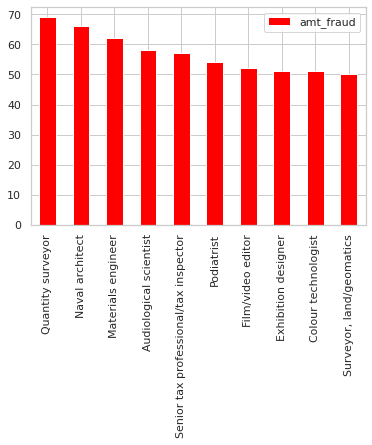

In [ ]:
sum_fraud = df_sum.drop(['amt_not_fraud'], axis=1)

sum_fraud_head = sum_fraud.head(10)
sum_fraud_head.plot(kind='bar', color=['red'],)

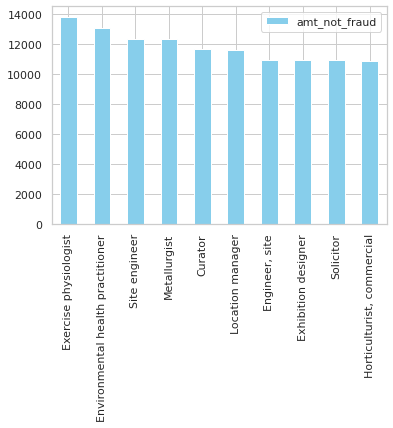

In [ ]:
df_sum = df_sum.sort_values(by=['amt_not_fraud'], ascending=False)

sum_fraud_not = df_sum.drop(['amt_fraud'], axis=1)

sum_fraud_not_head = sum_fraud_not.head(10)
sum_fraud_not_head.plot(kind='bar', color=['skyblue'],)

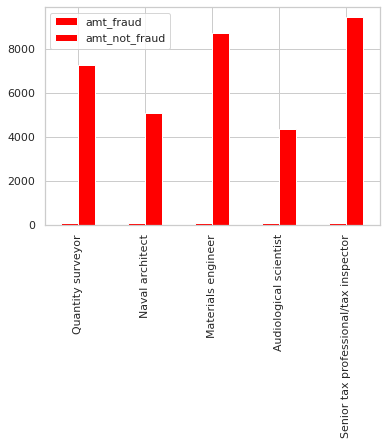

# EDA Linus

In [ ]:
total = pd.concat([test,train])

In [ ]:
total.corr()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
cc_num,1.000000,0.001826,0.041504,-0.058744,-0.048429,-0.009118,0.000284,-0.058415,-0.048421,-0.001125
amt,0.001826,1.000000,0.001979,-0.000670,-0.000735,0.004921,-0.002411,-0.000613,-0.000711,0.209308
zip,0.041504,0.001979,1.000000,-0.114554,-0.909795,0.077601,0.001017,-0.113934,-0.908981,-0.002190
lat,-0.058744,-0.000670,-0.114554,1.000000,-0.014744,-0.154816,0.000741,0.993582,-0.014709,0.002904
long,-0.048429,-0.000735,-0.909795,-0.014744,1.000000,-0.052359,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.009118,0.004921,0.077601,-0.154816,-0.052359,1.000000,-0.001636,-0.153863,-0.052329,0.000325
unix_time,0.000284,-0.002411,0.001017,0.000741,-0.000574,-0.001636,1.000000,0.000696,-0.000571,-0.013329
merch_lat,-0.058415,-0.000613,-0.113934,0.993582,-0.014585,-0.153863,0.000696,1.000000,-0.014554,0.002778
merch_long,-0.048421,-0.000711,-0.908981,-0.014709,0.999118,-0.052329,-0.000571,-0.014554,1.000000,0.000999
is_fraud,-0.001125,0.209308,-0.002190,0.002904,0.001022,0.000325,-0.013329,0.002778,0.000999,1.000000


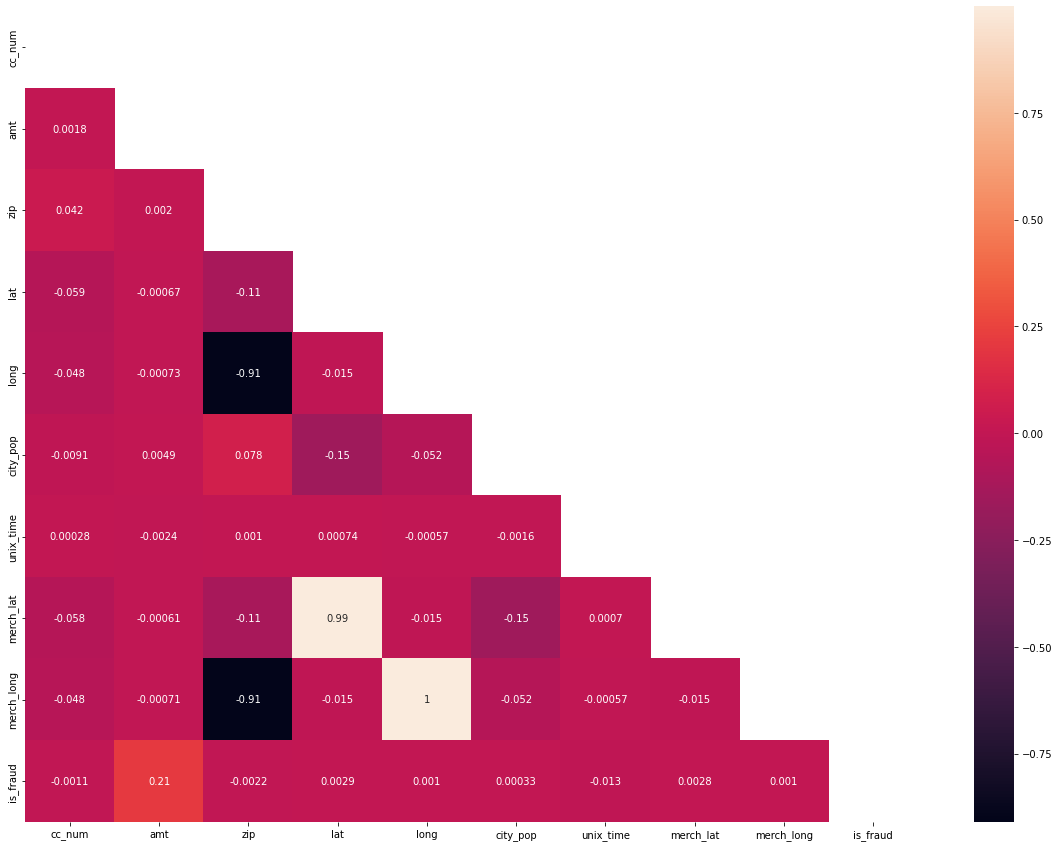

In [ ]:
matrix = np.triu(total.corr())
fig, ax = plt.subplots(figsize=(20,15))
plt.rcParams.update({'font.size': 10})
sns.heatmap(total.corr(), annot=True, mask=matrix)
plt.show()

percentage fraud by category

In [ ]:
categories = total.loc[total['is_fraud']==1].groupby(['category']).count()['trans_num'].sort_index().index
fraud = total.loc[total['is_fraud']==1].groupby(['category']).count()['trans_num'].sort_index()
non_fraud = total.loc[total['is_fraud']==0].groupby(['category']).count()['trans_num'].sort_index()
per = (total.loc[total['is_fraud']==1].groupby(['category']).count()['trans_num'].sort_index()/total.loc[total['is_fraud']==0].groupby(['category']).count()['trans_num'].sort_index())*100

w = 0.6

<BarContainer object of 14 artists>

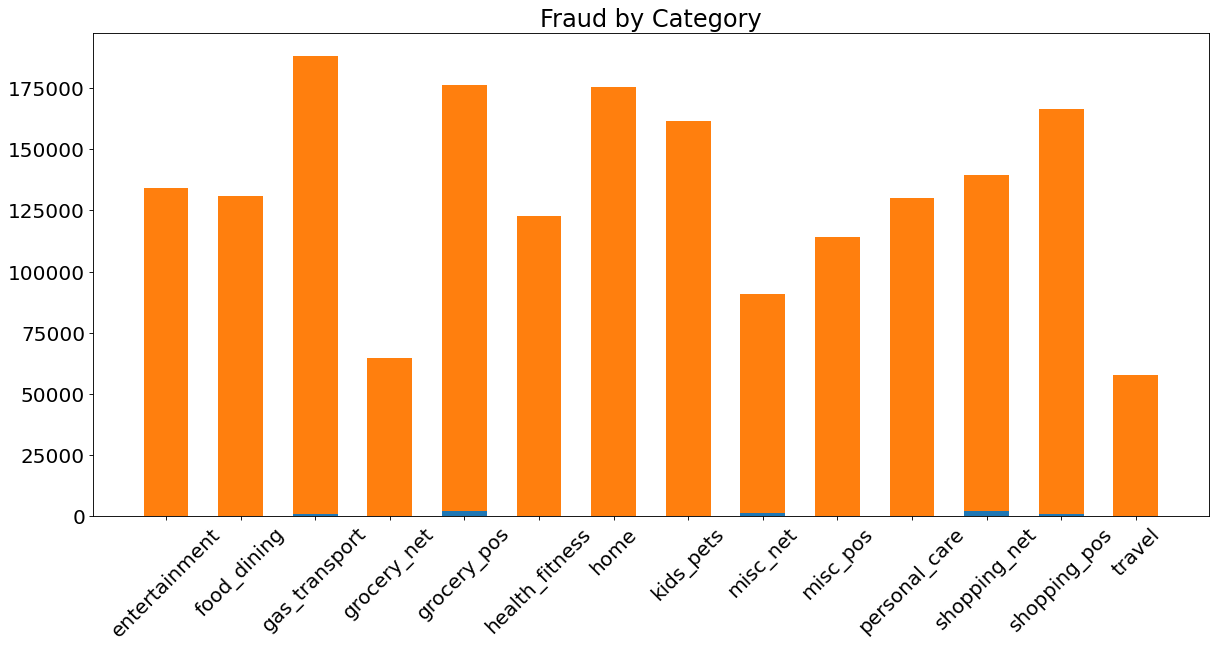

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.title('Fraud by Category')
for i, p in enumerate(per):
    ax.text(i, categories[i], '{:.2}%'.format(p), fontsize=25)
plt.bar(categories, fraud, w)
plt.bar(categories, non_fraud, w, bottom=fraud)

<BarContainer object of 14 artists>

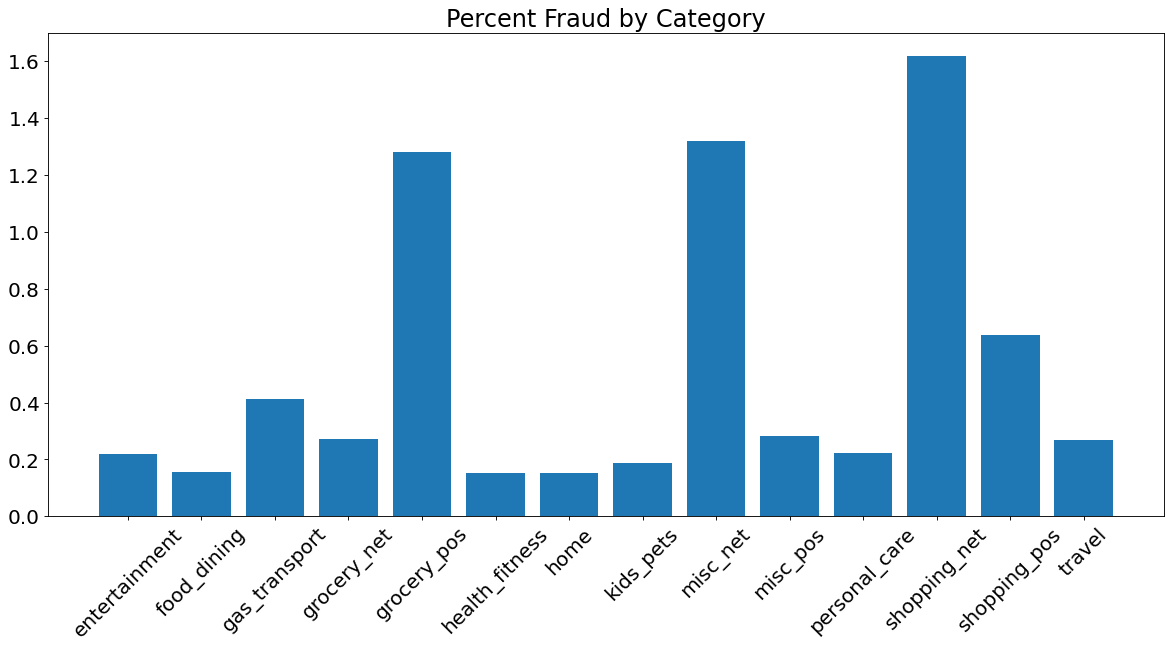

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.title('Percent Fraud by Category')
plt.xticks(rotation=45)
plt.bar(categories, per.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


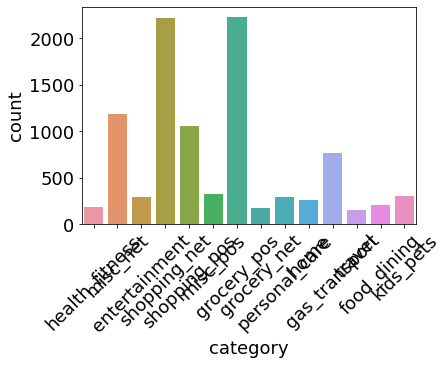

In [ ]:
sns.countplot(total.loc[total['is_fraud']==1]['category'])
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


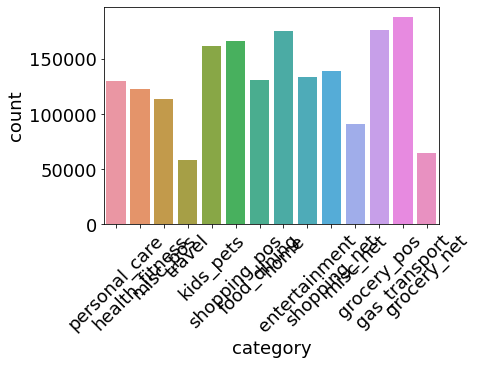

In [ ]:
sns.countplot(total['category'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
total.loc[total['is_fraud']==1]['category'].value_counts()/total['category'].value_counts()*100

entertainment     0.217719
food_dining       0.156813
gas_transport     0.410575
grocery_net       0.269737
grocery_pos       1.264537
health_fitness    0.150955
home              0.151032
kids_pets         0.187971
misc_net          1.303859
misc_pos          0.281890
personal_care     0.222931
shopping_net      1.592713
shopping_pos      0.634375
travel            0.269170
Name: category, dtype: float64

fraud by gender

In [ ]:
categories = total.loc[total['is_fraud']==1].groupby(['gender']).count()['trans_num'].sort_index().index
fraud = total.loc[total['is_fraud']==1].groupby(['gender']).count()['trans_num'].sort_index()
non_fraud = total.loc[total['is_fraud']==0].groupby(['gender']).count()['trans_num'].sort_index()
per = (total.loc[total['is_fraud']==1].groupby(['gender']).count()['trans_num'].sort_index()/total.loc[total['is_fraud']==0].groupby(['gender']).count()['trans_num'].sort_index())*100

w = 0.6

<BarContainer object of 2 artists>

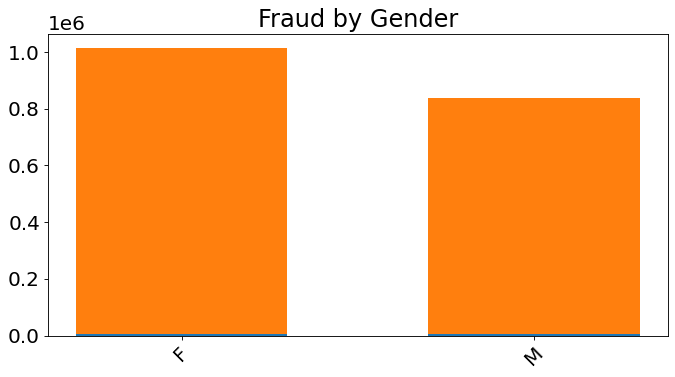

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.title('Fraud by Gender')
for i, p in enumerate(per):
    ax.text(i, categories[i], '{:.2}%'.format(p), fontsize=25)
plt.bar(categories, fraud, w)
plt.bar(categories, non_fraud, w, bottom=fraud)

<BarContainer object of 2 artists>

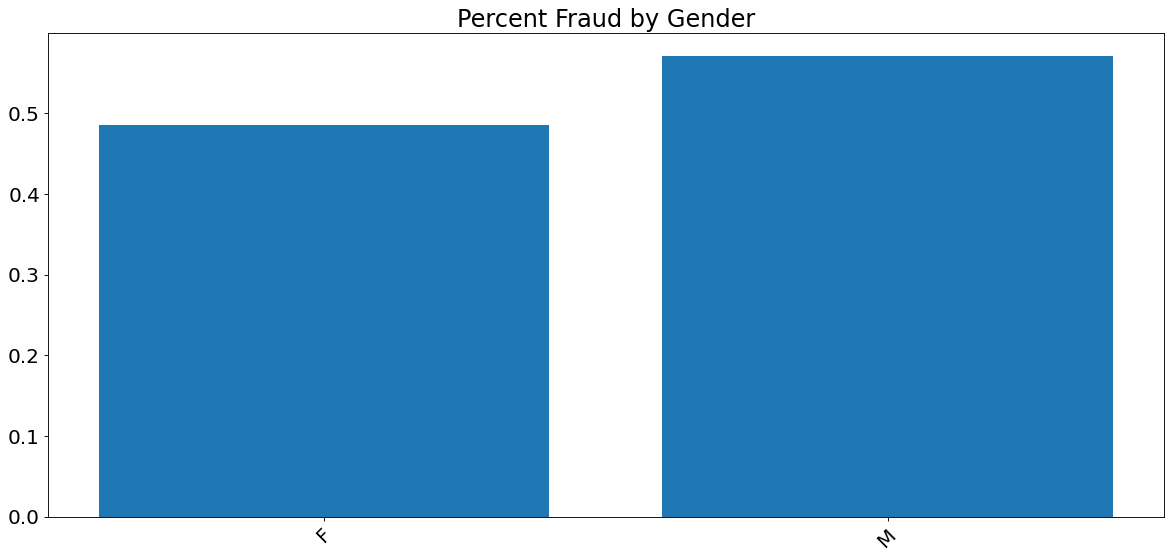

In [ ]:
plt.figure(figsize=(18, 8), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.title('Percent Fraud by Gender')
plt.xticks(rotation=45)
plt.bar(categories, per.values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


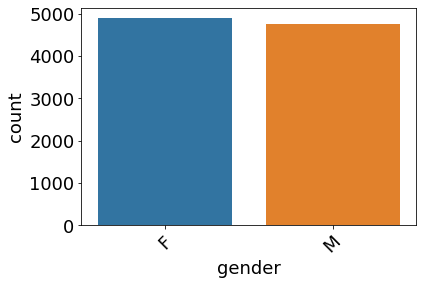

In [ ]:
sns.countplot(total.loc[total['is_fraud']==1]['gender'])
plt.xticks(rotation=45)
plt.show()

fraud by state

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


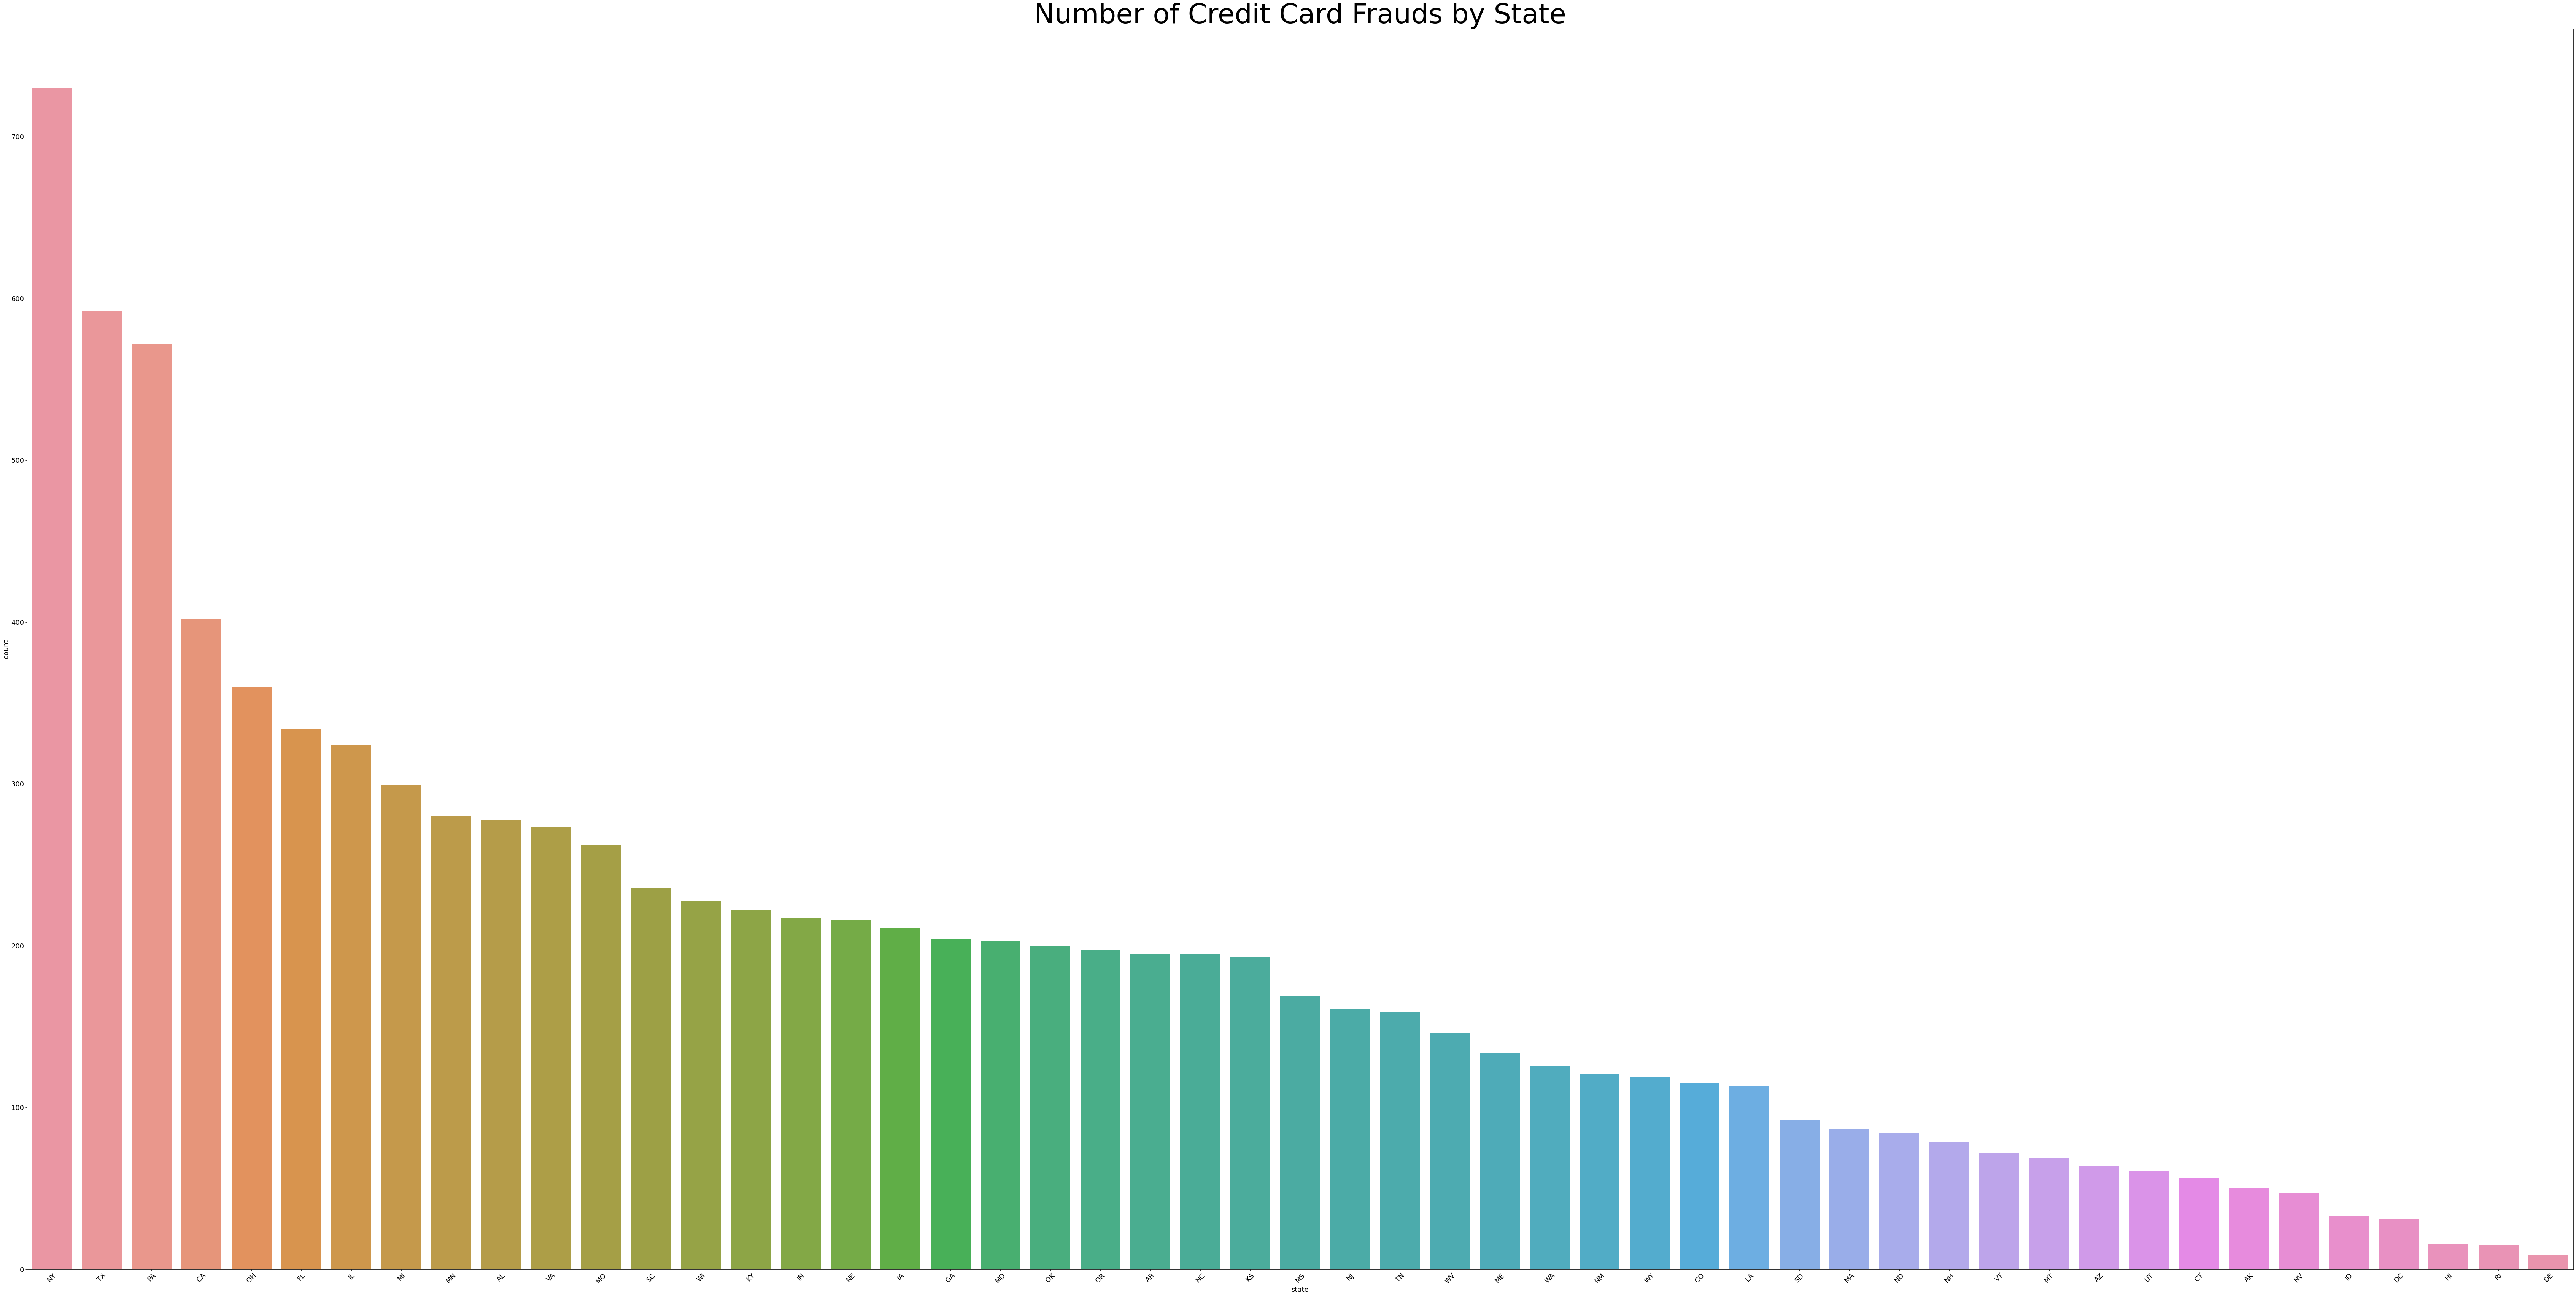

In [ ]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(total.loc[total['is_fraud']==1]['state'], order=total.loc[total['is_fraud']==1]['state'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Credit Card Frauds by State")
plt.show()

In [ ]:
total[['city_pop', 'state']]

,city_pop,state
0,333497,SC
1,302,UT
2,34496,NY
3,54767,FL
4,1126,MI
...,...,...
1296670,258,UT
1296671,100,MD
1296672,899,NM
1296673,1126,SD


In [ ]:
total['city_pop'].unique()

array([ 333497,     302,   34496,   54767,    1126,     520,    1139,
           343,    3688,     263,     564,    1645,   26551,    2258,
          1089,   88735,   32891,    5875,   10076,     606,  165556,
        525713,   22930,    9594,    6951,  107941,     828,    2470,
          4993, 1577385,    3263,   71485,    3032,     878,   11751,
          1196,   93193,   67082,  493806,     568,  378909, 1595797,
         75830,     320,     258,     725,     100,    1686,    2456,
           241,     824,     276,    1847,  181438,     970,    5577,
        601723,  172247, 2504700,    2872,  172817,   17867,   27971,
           811,  224256,     192,    6841,  124967,    4074,   20328,
           744,    5196,  341043,     632,     551,    2368,      85,
           571,    8874,    1970,    2223,    3279,    4680,     177,
           142,     365,     376,    1925,    2206,    2523,    5161,
         47772,   31515,     470, 1526206,     509,    5732,    7268,
          6713,     

In [ ]:
total['state'].unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK', 'DE'], dtype=object)

In [ ]:
total['state_pop'] = total.groupby('state')['city_pop'].transform('sum')

In [ ]:
total['state_pop'].unique()

array([ 1123608023,    98297162, 18048074359,  8787415815,  5254143791,
       15382576759,    23236638, 10580514525, 38713285730,  2373742153,
         273655140,  4980741123,  2541838590,   921299450,  3291927380,
        1833116846,  2097287926,    48294499,   180986631,   971752081,
         559290596,   379712601,   347275074,  2263850950,   585056644,
        3592863501,   112374234,  2481185291,  3086838990,  9624310285,
          63319212,  4546227450,  3305317774,   482653182,   185232009,
        1077932797,   505337594,   415859386,  1648987389,   312730763,
        1822035405,  5557379662,  2104110041,    35875964,     8813161,
          21799926,  1388070556,    10393654,   151660395,      552501,
            169191])

In [ ]:
total['state'].unique()

array(['SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD', 'PA', 'TX', 'KY', 'WY',
       'AL', 'LA', 'GA', 'CO', 'OH', 'WI', 'VT', 'AR', 'NJ', 'IA', 'MD',
       'MS', 'KS', 'IL', 'MO', 'ME', 'TN', 'DC', 'AZ', 'MT', 'MN', 'OK',
       'WA', 'WV', 'NM', 'MA', 'NE', 'VA', 'ID', 'OR', 'IN', 'NC', 'NH',
       'ND', 'CT', 'NV', 'HI', 'RI', 'AK', 'DE'], dtype=object)

In [ ]:
pd.DataFrame({'state':total['state'].unique(), 'state_pop':total['state_pop'].unique()}).set_index('state').sort_index()['state_pop']

state
AK         552501
AL     4980741123
AR      180986631
AZ     9624310285
CA    15382576759
CO     3291927380
CT       21799926
DC     3086838990
DE         169191
FL     8787415815
GA      921299450
HI       10393654
IA      559290596
ID      312730763
IL      585056644
IN     5557379662
KS     2263850950
KY     2373742153
LA     2541838590
MA      505337594
MD      379712601
ME      112374234
MI     5254143791
MN     4546227450
MO     3592863501
MS      347275074
MT       63319212
NC     2104110041
ND        8813161
NE      415859386
NH       35875964
NJ      971752081
NM     1077932797
NV     1388070556
NY    18048074359
OH     1833116846
OK     3305317774
OR     1822035405
PA    10580514525
RI      151660395
SC     1123608023
SD       23236638
TN     2481185291
TX    38713285730
UT       98297162
VA     1648987389
VT       48294499
WA      482653182
WI     2097287926
WV      185232009
WY      273655140
Name: state_pop, dtype: int64

In [ ]:
total.loc[total['is_fraud']==1]['state'].value_counts().sort_index()

AK     50
AL    278
AR    195
AZ     64
CA    402
CO    115
CT     56
DC     31
DE      9
FL    334
GA    204
HI     16
IA    211
ID     33
IL    324
IN    217
KS    193
KY    222
LA    113
MA     87
MD    203
ME    134
MI    299
MN    280
MO    262
MS    169
MT     69
NC    195
ND     84
NE    216
NH     79
NJ    161
NM    121
NV     47
NY    730
OH    360
OK    200
OR    197
PA    572
RI     15
SC    236
SD     92
TN    159
TX    592
UT     61
VA    273
VT     72
WA    126
WI    228
WV    146
WY    119
Name: state, dtype: int64

In [ ]:
(pd.DataFrame({'state':total['state'].unique(), 'state_pop':total['state_pop'].unique()}).set_index('state').sort_index()['state_pop']/total.loc[total['is_fraud']==1]['state'].value_counts().sort_index()*100).sort_values()

state
AK    1.105002e+06
DE    1.879900e+06
ND    1.049186e+07
SD    2.525722e+07
CT    3.892844e+07
NH    4.541261e+07
HI    6.496034e+07
VT    6.707569e+07
ME    8.386137e+07
MT    9.176697e+07
AR    9.281366e+07
WV    1.268712e+08
UT    1.611429e+08
IL    1.805730e+08
MD    1.870505e+08
NE    1.925275e+08
MS    2.054882e+08
WY    2.299623e+08
IA    2.650666e+08
WA    3.830581e+08
GA    4.516174e+08
SC    4.761051e+08
OH    5.091991e+08
MA    5.808478e+08
NJ    6.035727e+08
VA    6.040247e+08
NM    8.908536e+08
WI    9.198631e+08
OR    9.248911e+08
ID    9.476690e+08
RI    1.011069e+09
KY    1.069253e+09
NC    1.079031e+09
KS    1.172980e+09
MO    1.371322e+09
TN    1.560494e+09
MN    1.623653e+09
OK    1.652659e+09
MI    1.757239e+09
AL    1.791633e+09
PA    1.849740e+09
LA    2.249415e+09
NY    2.472339e+09
IN    2.561004e+09
FL    2.630963e+09
CO    2.862546e+09
NV    2.953342e+09
CA    3.826512e+09
TX    6.539406e+09
DC    9.957545e+09
AZ    1.503798e+10
dtype: float64

fraud by amount

In [ ]:
total.loc[total['is_fraud']==1]['amt']

1685         24.84
1767        780.52
1781        620.33
1784       1077.69
1857        842.65
            ...   
1295399     977.01
1295491    1210.91
1295532      10.24
1295666      21.69
1295733      10.20
Name: amt, Length: 9651, dtype: float64

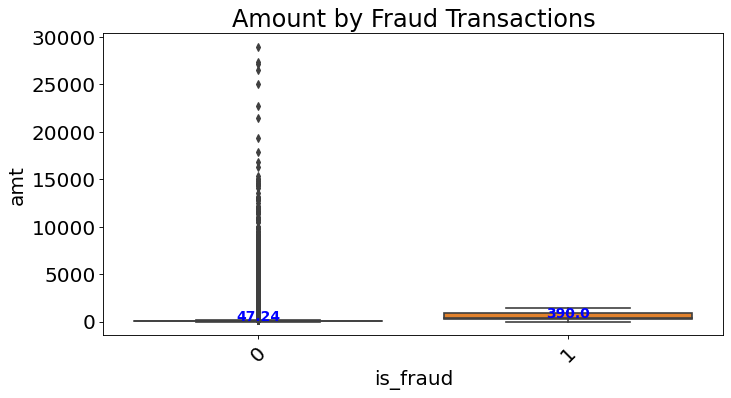

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.title('Amount by Fraud Transactions')
box_plot = sns.boxplot(x="is_fraud", y="amt",data=total)

medians = total.groupby(['is_fraud'])['amt'].median()
vertical_offset = total['amt'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick] + vertical_offset, medians[xtick], 
            horizontalalignment='center',size='x-small',color='b',weight='semibold')

{'boxes': [<matplotlib.lines.Line2D at 0x7f7887801310>],
 'caps': [<matplotlib.lines.Line2D at 0x7f78877fc550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f787d915590>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f787d915050>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7887801a90>,
  <matplotlib.lines.Line2D at 0x7f7887801fd0>]}

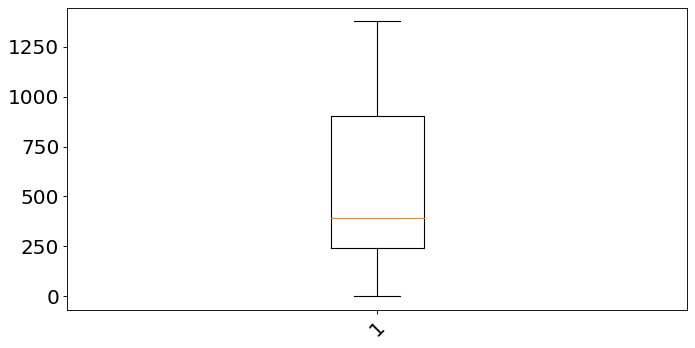

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.boxplot(total.loc[total['is_fraud']==1]['amt'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f7887a9b5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7880249e50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f787dbafe90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f787dbaf950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f78802493d0>,
  <matplotlib.lines.Line2D at 0x7f7880249910>]}

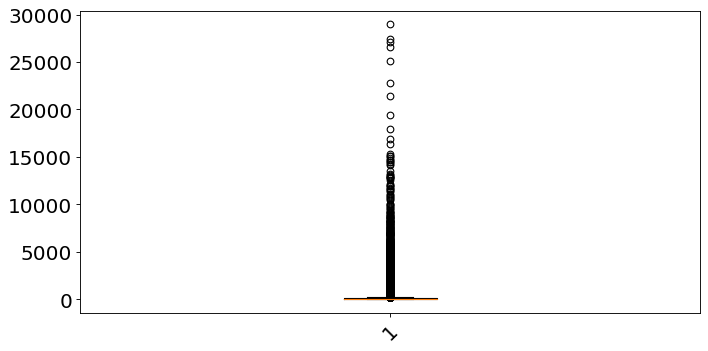

In [ ]:
plt.figure(figsize=(10, 5), dpi=80)
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.boxplot(total.loc[total['is_fraud']==0]['amt'])

# Predictive

## Feature Engineering

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [ ]:
df = train.copy()

In [ ]:
df['trans_minute'] = pd.to_datetime(df['trans_date_trans_time']).dt.minute
df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['trans_day'] = pd.to_datetime(df['trans_date_trans_time']).dt.day
df['trans_month'] = pd.to_datetime(df['trans_date_trans_time']).dt.month
df['trans_year'] = pd.to_datetime(df['trans_date_trans_time']).dt.year

In [ ]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
df['age'] = df['dob'].apply(lambda x: calculate_age(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [ ]:
df.drop(columns=['cc_num', 'unix_time', 'zip', 'trans_num', 'trans_date', 'trans_date_trans_time', 'dob', 'first', 'last', 'street'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   merchant      1296675 non-null  object 
 1   category      1296675 non-null  object 
 2   amt           1296675 non-null  float64
 3   gender        1296675 non-null  object 
 4   city          1296675 non-null  object 
 5   state         1296675 non-null  object 
 6   lat           1296675 non-null  float64
 7   long          1296675 non-null  float64
 8   city_pop      1296675 non-null  int64  
 9   job           1296675 non-null  object 
 10  merch_lat     1296675 non-null  float64
 11  merch_long    1296675 non-null  float64
 12  is_fraud      1296675 non-null  int64  
 13  trans_minute  1296675 non-null  int64  
 14  trans_hour    1296675 non-null  int64  
 15  trans_day     1296675 non-null  int64  
 16  trans_month   1296675 non-null  int64  
 17  trans_year    1296675 non-n

In [ ]:
df[df.select_dtypes(['object']).columns]

,merchant,category,gender,city,state,job
0,"fraud_Rippin, Kub and Mann",misc_net,F,Moravian Falls,NC,"Psychologist, counselling"
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Orient,WA,Special educational needs teacher
2,fraud_Lind-Buckridge,entertainment,M,Malad City,ID,Nature conservation officer
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Boulder,MT,Patent attorney
4,fraud_Keeling-Crist,misc_pos,M,Doe Hill,VA,Dance movement psychotherapist
...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,Hatch,UT,Geoscientist
1296671,fraud_Abernathy and Sons,food_dining,M,Tuscarora,MD,"Production assistant, television"
1296672,fraud_Stiedemann Ltd,food_dining,M,High Rolls Mountain Park,NM,Naval architect
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,Manderson,SD,Volunteer coordinator


In [ ]:
df[['merchant', 'category', 'gender', 'city', 'state', 'job', 'is_fraud']]

,merchant,category,gender,city,state,job,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,F,Moravian Falls,NC,"Psychologist, counselling",0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Orient,WA,Special educational needs teacher,0
2,fraud_Lind-Buckridge,entertainment,M,Malad City,ID,Nature conservation officer,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Boulder,MT,Patent attorney,0
4,fraud_Keeling-Crist,misc_pos,M,Doe Hill,VA,Dance movement psychotherapist,0
...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,Hatch,UT,Geoscientist,0
1296671,fraud_Abernathy and Sons,food_dining,M,Tuscarora,MD,"Production assistant, television",0
1296672,fraud_Stiedemann Ltd,food_dining,M,High Rolls Mountain Park,NM,Naval architect,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,Manderson,SD,Volunteer coordinator,0


In [ ]:
"""enc = OrdinalEncoder()
np.random.seed(99)
df[df.select_dtypes(['object']).columns] = enc.fit_transform(df[df.select_dtypes(['object']).columns])"""

"enc = OrdinalEncoder()\nnp.random.seed(99)\ndf[df.select_dtypes(['object']).columns] = enc.fit_transform(df[df.select_dtypes(['object']).columns])"

In [ ]:
df

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_minute,trans_hour,trans_day,trans_month,trans_year,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,0,1,1,2019,34
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,0,1,1,2019,43
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,0,1,1,2019,60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,1,0,1,1,2019,55
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,3,0,1,1,2019,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765,0,12,12,21,6,2020,60
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",38.906881,-78.246528,0,12,12,21,6,2020,42
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529,0,12,12,21,6,2020,54
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160,0,13,12,21,6,2020,41


In [ ]:
y = df['is_fraud']
X = df.drop(columns='is_fraud')

## Modeling

In [ ]:
nn = round(np.sqrt(12))
N_SPLITS = 5

In [ ]:
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=nn),
    xgb.XGBRFClassifier(random_state=0),
    xgb.XGBClassifier(random_state=0)
]
scores = pd.DataFrame()
for estimator in estimators:
    pipeline = make_pipeline(
        StandardScaler(),
        estimator
    )
    scores[estimator.__class__.__name__] = cross_val_score(
            pipeline, X, y, scoring='roc_auc',
            cv=N_SPLITS
    )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/usr/local/lib/python3.7/dist-packages/joblib/memory.py", line 34

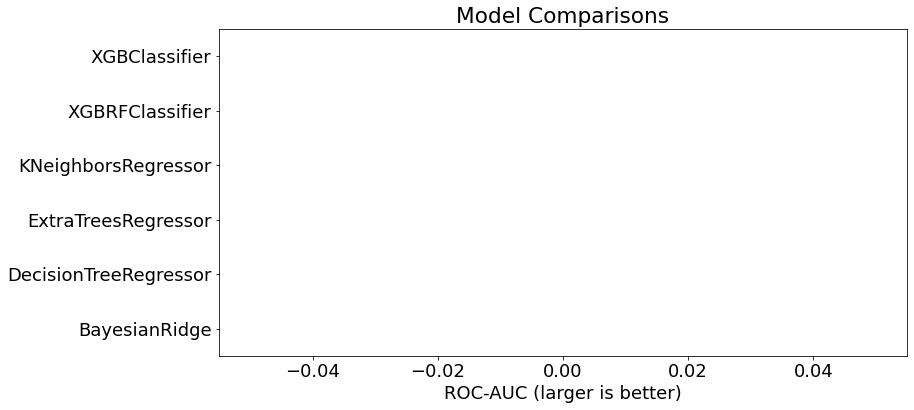

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
means = scores.mean().sort_values()
errors = scores.std().sort_values()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Model Comparisons')
ax.set_xlabel('ROC-AUC (larger is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.show()

In [ ]:
X

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,trans_minute,trans_hour,trans_day,trans_month,trans_year,age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1,1,2019,34
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1,1,2019,43
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,0,1,1,2019,60
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,1,0,1,1,2019,55
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,3,0,1,1,2019,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,36.841266,-111.690765,12,12,21,6,2020,60
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",38.906881,-78.246528,12,12,21,6,2020,42
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,33.619513,-105.130529,12,12,21,6,2020,54
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,42.788940,-103.241160,13,12,21,6,2020,41


In [ ]:
ord_cols = ['merchant', 'category', 'gender', 'city', 'state', 'job']
cyc_cols = ['trans_minute',	'trans_hour',	'trans_day',	'trans_month',	'trans_year']

In [ ]:
"""pipeline = make_pipeline(
        ColumnTransformer([
                           ('ord_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), ord_cols),
                           ('cyc_enc', CyclicalTransformer(variables=None, drop_original=True), cyc_cols)
        ]),
        StandardScaler(),
        xgb.XGBClassifier(random_state=0)
)"""

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(k_neighbors=2)
np.random.seed(1772023)
X_smote, y_smote = smote.fit_resample(X, y)

ValueError: ignored

In [ ]:
pipeline = imbpipeline(steps = [['encode', ColumnTransformer([
                                  ('ord_enc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan), ord_cols),
                                  ('cyc_enc', CyclicalTransformer(variables=None, drop_original=True), cyc_cols)
        ])],
        #['smote', SMOTE(random_state=0)],
        ['scaler', StandardScaler()],
        ['xgb', xgb.XGBClassifier(random_state=0)]
])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
pipeline.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('encode',
                 ColumnTransformer(transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['merchant', 'category',
                                                   'gender', 'city', 'state',
                                                   'job']),
                                                 ('cyc_enc',
                                                  CyclicalTransformer(drop_original=True),
                                                  ['trans_minute', 'trans_hour',
                                                   'trans_day', 'trans_month',
                                                   'trans_year'])])),
                ('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['xgb', XGBClassifier()]])

In [ ]:
score = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=N_SPLITS)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecated; CyclicalTransformer() is deprecated in version 1.3 and will be removed in version 1.4. Use CyclicalFeatures() instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class CyclicalTransformer is deprecat

In [ ]:
np.mean(score)

0.8181913509376308

In [ ]:
X.columns

Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'merch_lat', 'merch_long', 'trans_minute',
       'trans_hour', 'trans_day', 'trans_month', 'trans_year', 'age'],
      dtype='object')

In [ ]:
pipeline

Pipeline(steps=[('encode',
                 ColumnTransformer(transformers=[('ord_enc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan),
                                                  ['merchant', 'category',
                                                   'gender', 'city', 'state',
                                                   'job']),
                                                 ('cyc_enc',
                                                  CyclicalTransformer(drop_original=True),
                                                  ['trans_minute', 'trans_hour',
                                                   'trans_day', 'trans_month',
                                                   'trans_year'])])),
                ('smote', SMOTE(random_state=11)), ('scaler', StandardScaler()),
                ['xgb', XGBClassifier()]])

In [ ]:
pipeline.steps[3][1]

XGBClassifier()

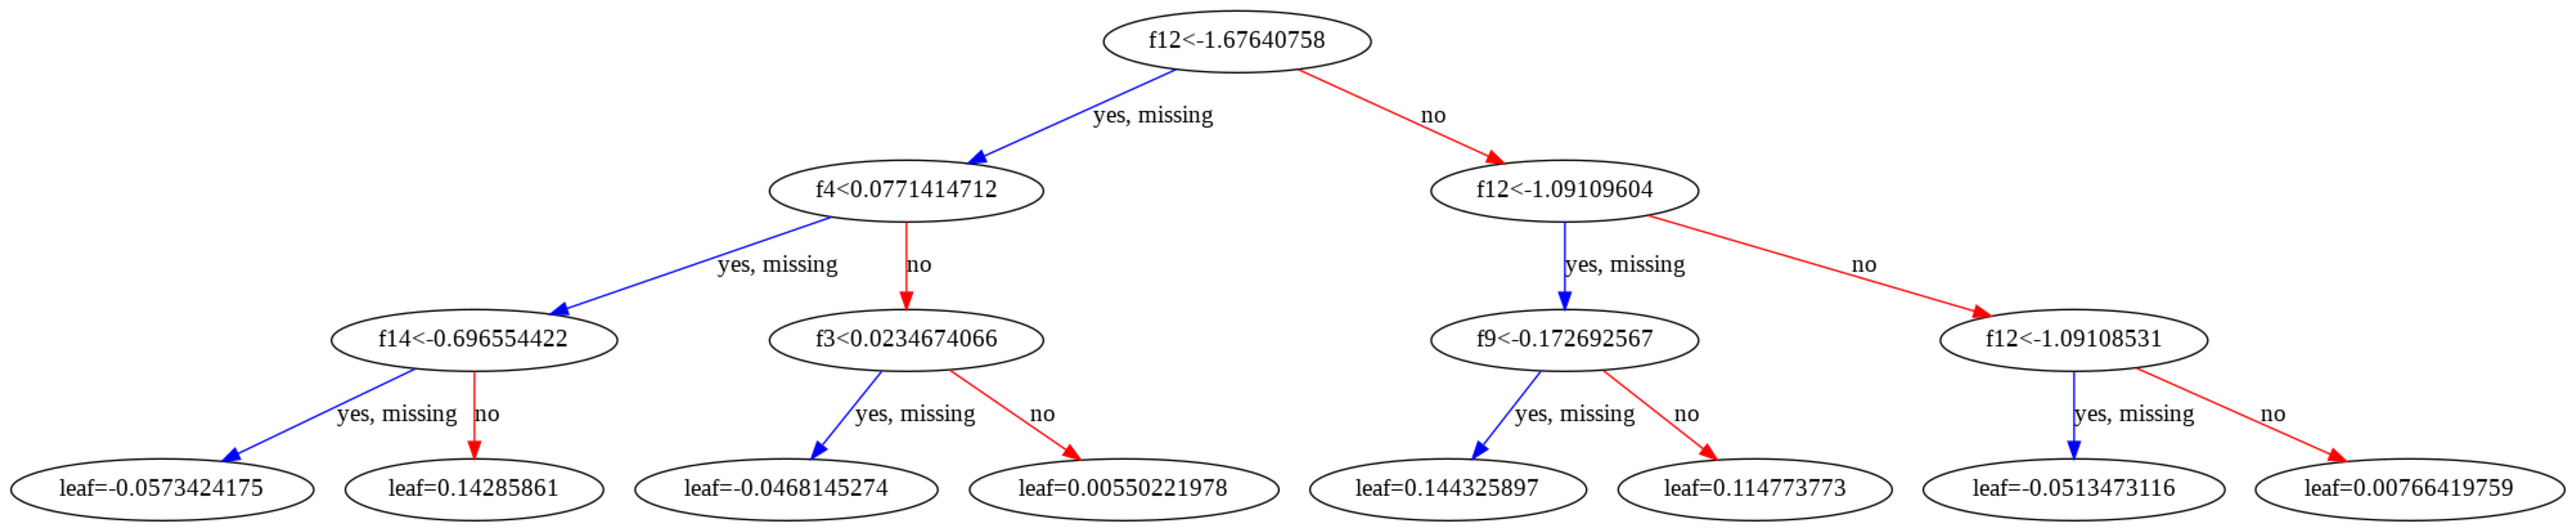

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
xgb.plot_tree(pipeline.steps[3][1], num_trees = pipeline.steps[3][1].n_estimators-1)

Feature: merchant, Score: 0.00020060698443558067
Feature: category, Score: 0.07575979083776474
Feature: amt, Score: 0.19719627499580383
Feature: gender, Score: 0.00449886079877615
Feature: city, Score: 0.003840712131932378
Feature: state, Score: 0.005214907694607973
Feature: lat, Score: 0.05595109611749649
Feature: long, Score: 0.046368300914764404
Feature: city_pop, Score: 0.11748175323009491
Feature: job, Score: 0.1650099903345108
Feature: merch_lat, Score: 0.02225339412689209
Feature: merch_long, Score: 0.027896972373127937
Feature: trans_minute, Score: 0.07237223535776138
Feature: trans_hour, Score: 0.0786779448390007
Feature: trans_day, Score: 0.127277210354805
Feature: trans_month, Score: 0.0


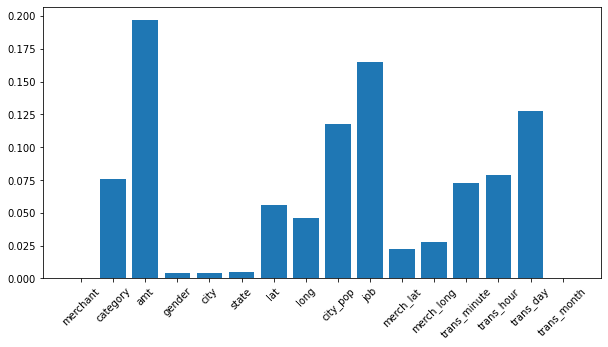

In [ ]:
importance = pipeline.steps[3][1].feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print(f'Feature: {X.columns[i]}, Score: {v}')
# plot feature importance
plt.rcParams.update({'font.size': 10})
rcParams['figure.figsize'] = 10,5
plt.bar([X.columns[i] for i in range(len(importance))], importance)
plt.xticks(rotation=45)
plt.show()

## Testing

In [ ]:
df_test = test.copy()

In [ ]:
df_test['trans_minute'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.minute
df_test['trans_hour'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.hour
df_test['trans_day'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.day
df_test['trans_month'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.month
df_test['trans_year'] = pd.to_datetime(df_test['trans_date_trans_time']).dt.year

In [ ]:
df_test['age'] = df_test['dob'].apply(lambda x: calculate_age(x))

In [ ]:
df_test.drop(columns=['cc_num', 'unix_time', 'zip', 'trans_num', 'trans_date', 'trans_date_trans_time', 'dob', 'first', 'last', 'street'],inplace=True)
#df_test[df_test.select_dtypes(['object']).columns] = enc.fit_transform(df_test[df_test.select_dtypes(['object']).columns])
df_test

,merchant,category,amt,gender,city,state,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,trans_minute,trans_hour,trans_day,trans_month,trans_year,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,14,12,21,6,2020,54
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,14,12,21,6,2020,32
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,14,12,21,6,2020,51
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,15,12,21,6,2020,34
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,15,12,21,6,2020,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,Luray,MO,40.4931,-91.8912,519,Town planner,39.946837,-91.333331,0,59,23,31,12,2020,56
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,Lake Jackson,TX,29.0393,-95.4401,28739,Futures trader,29.661049,-96.186633,0,59,23,31,12,2020,22
555716,fraud_Rau-Robel,kids_pets,86.88,F,Burbank,WA,46.1966,-118.9017,3684,Musician,46.658340,-119.715054,0,59,23,31,12,2020,40
555717,fraud_Breitenberg LLC,travel,7.99,M,Mesa,ID,44.6255,-116.4493,129,Cartographer,44.470525,-117.080888,0,59,23,31,12,2020,56


In [ ]:
y_test = df_test['is_fraud']
X_test = df_test.drop(columns='is_fraud')

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
np.unique(y_pred)

array([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
roc_curve(y_test, y_pred)

(array([0.        , 0.01714857, 1.        ]),
 array([0.        , 0.16736597, 1.        ]),
 array([2, 1, 0]))

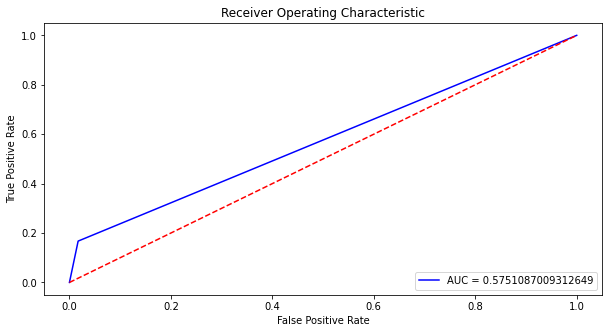

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()